# Análise Exploratória 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lendo os dados de acidente de trânsito para os anos de 2021, 2022, 2023 e 2024, selecionando a codificação correta para 2021.csv e 2023.csv e imprimindo o shape de cada dataframe. Percebe-se que a quatidade de colunas para os dataframes são equivalentes. 

In [2]:
base_path = '../data/raw/' 

dados_2021 = pd.read_csv(base_path + '2021.csv', encoding='latin-1', sep=';')
dados_2022 = pd.read_csv(base_path + '2022.csv', sep=',')
dados_2023 = pd.read_csv(base_path + '2023.csv', encoding='latin-1', sep=';')
dados_2024 = pd.read_csv(base_path + '2024.csv', sep=',')

dados_2021.shape, dados_2022.shape, dados_2023.shape, dados_2024.shape

((64567, 30), (64606, 30), (67766, 30), (53950, 30))

Verificando se os índices das 4 bases são os mesmos 

In [3]:
colunas_dados_2021 = set(dados_2021.columns)
colunas_dados_2022 = set(dados_2022.columns)
colunas_dados_2023 = set(dados_2023.columns)
colunas_dados_2024 = set(dados_2024.columns) 

if colunas_dados_2021 == colunas_dados_2022 == colunas_dados_2023 == colunas_dados_2024:
    print('Os 4 dataframes possuem exatamente as mesmas colunas.')
else:
    print('Os 4 dataframes não possuem as mesmas colunas, isso precisa ser tratado.')

Os 4 dataframes possuem exatamente as mesmas colunas.


Visualizando o balanceamento de registros de acidentes para cada ano 

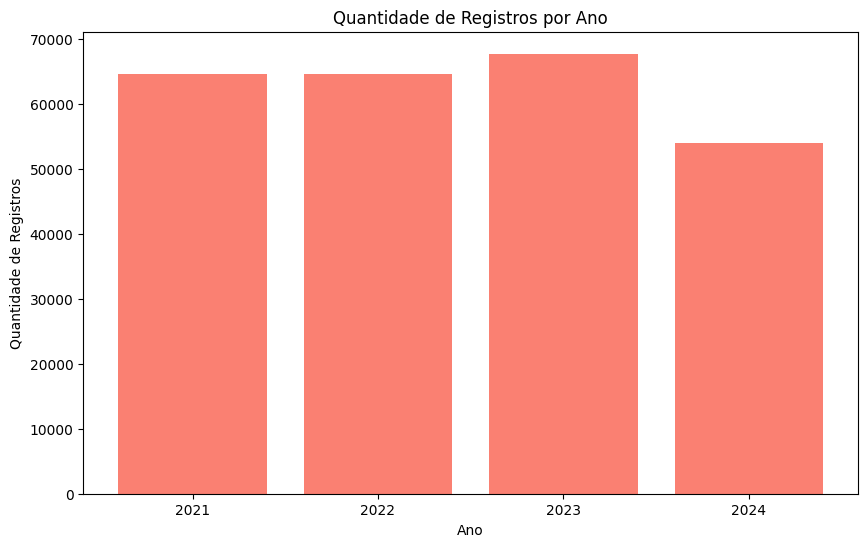

In [4]:
anos = ['2021', '2022', '2023', '2024']
quantidades = [len(dados_2021), len(dados_2022), len(dados_2023), len(dados_2024)]

plt.figure(figsize=(10, 6))
plt.bar(anos, quantidades, color='salmon')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Ano')
plt.show()

Visão geral de cada dataframe:

In [5]:
dados_2021

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,5,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,0,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64562,610856.0,2021-06-05,sábado,15:10:00,ES,101,"178,4",ARACRUZ,Pista Escorregadia,Colisão com objeto,...,0,0,0,1,2,"-19,61032522","-40,20858272",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
64563,611724.0,2021-10-26,terça-feira,09:15:00,BA,407,202,CALDEIRAO GRANDE,Desrespeitar a preferência no cruzamento,Colisão transversal,...,1,3,0,1,2,"-11,12478109","-40,06473541",SPRF-BA,DEL04-BA,UOP02-DEL04-BA
64564,613470.0,2021-06-26,sábado,18:45:00,MG,40,"551,7",NOVA LIMA,Pedestre cruzava a pista fora da faixa,Atropelamento de Pedestre,...,0,1,1,0,2,"-20,05411435","-43,97101875",SPRF-MG,DEL01-MG,UOP02-DEL01-MG
64565,613705.0,2021-10-31,domingo,10:40:00,AL,104,74,MESSIAS,Obras na pista,Queda de ocupante de veículo,...,0,0,0,2,1,"-9,3682254","-35,83573003",SPRF-AL,DEL01-AL,UOP02-DEL01-AL


In [6]:
dados_2022

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,1,1,3,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,1,1,2,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,1,1,3,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP03-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64601,610529,2022-11-09,quarta-feira,23:41:00,PE,232,"87,7",GRAVATA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,1,0,1,"-8,21379064","-35,62898606",SPRF-PE,DEL02-PE,UOP02-DEL02PE
64602,614333,2022-07-26,terça-feira,02:30:00,SC,101,201,SAO JOSE,Acessar a via sem observar a presença dos outr...,Atropelamento de Pedestre,...,2,0,0,2,2,"-27,54836599","-48,61977975",SPRF-SC,DEL01-SC,UOP01-DEL01-SC
64603,614646,2022-01-19,quarta-feira,04:10:00,MA,222,"638,3",ACAILANDIA,Velocidade Incompatível,Tombamento,...,3,1,0,5,1,"-4,781428","-47,18019",SPRF-MA,DEL04-MA,UOP03-DEL04-MA
64604,617171,2022-09-30,sexta-feira,13:05:00,SC,470,56,BLUMENAU,Acesso irregular,Colisão transversal,...,0,1,0,1,2,"-26,87674","-49,127743",NaN,NaN,NaN


In [7]:
dados_2023

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67761,619297,2023-04-19,quarta-feira,20:50:00,PR,376,475,PONTA GROSSA,Pedestre andava na pista,Atropelamento de Pedestre,...,0,4,0,0,2,"-25,05467785","-50,22938892",NaN,NaN,NaN
67762,619475,2023-06-20,terça-feira,20:30:00,MA,222,"206,5",ITAPECURU MIRIM,Acessar a via sem observar a presença dos outr...,Colisão transversal,...,0,1,0,1,2,"-3,40552588","-44,35174989",NaN,NaN,NaN
67763,619476,2023-05-18,quinta-feira,06:15:00,ES,101,"62,7",SAO MATEUS,Conversão proibida,Colisão transversal,...,1,0,0,3,2,"-18,69020499","-39,86154403",NaN,NaN,NaN
67764,619913,2023-08-22,terça-feira,15:00:00,MG,50,15,UBERLANDIA,Acumulo de areia ou detritos sobre o pavimento,Tombamento,...,1,0,0,1,1,"-18,91385522","-48,17243636",NaN,NaN,NaN


In [8]:
dados_2024

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53945,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-12,87206398","-38,42746403",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
53946,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-22,535843","-42,99125",SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ
53947,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,0,3,0,0,2,"0,08723365","-51,08569007",SPRF-AP,DEL01-AP,UOP01-DEL01-AP
53948,635887.0,2024-09-21,sábado,18:50:00,PR,277,679,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,0,1,0,1,2,"-25,31758044","-54,15684223",SPRF-PR,DEL05-PR,UOP01-DEL05-PR


Verificando se todos os dataframes possuem as mesmas colunas

In [9]:
colunas = [set(dados_2021.columns), set(dados_2022.columns), set(dados_2023.columns), set(dados_2024.columns)]

differences_found = False

for i in range(len(colunas)):
    for k in range(len(colunas)):
        if i != k:
            diferencas = colunas[i] - colunas[k]
            if diferencas:
                differences_found = True
                print(f"As seguintes colunas estão no dataset {i + 1} e não estão no dataset {k + 1}: {diferencas}")

if not differences_found:
    print("As colunas dos datasets são as mesmas.")

As colunas dos datasets são as mesmas.


Juntando os dados por linha para demais análises, percebe-se que a nova tabela possui 250889 registros

In [10]:
dados = pd.concat([dados_2021, dados_2022, dados_2023, dados_2024], axis=0, ignore_index=True)
dados.shape

(250889, 30)

Visão geral do novo dataframe (mostando os 5 primeiros registros e os 5 últimos)

In [11]:
dados

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,5,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,0,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250884,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-12,87206398","-38,42746403",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
250885,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-22,535843","-42,99125",SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ
250886,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,0,3,0,0,2,"0,08723365","-51,08569007",SPRF-AP,DEL01-AP,UOP01-DEL01-AP
250887,635887.0,2024-09-21,sábado,18:50:00,PR,277,679,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,0,1,0,1,2,"-25,31758044","-54,15684223",SPRF-PR,DEL05-PR,UOP01-DEL05-PR


Todas as colunas presente na nossa tabela de dados

In [12]:
dados.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

Verificando registros nulos para cada coluna da tabela


In [13]:
nulos = dados.isnull().sum()
nulos[nulos>0]

classificacao_acidente      4
regional                   23
delegacia                  85
uop                       219
dtype: int64

Verificando se tem dados nulos simultâneos

In [14]:
nulos_simultaneos = dados[['uop', 'delegacia', 'regional', 'classificacao_acidente']].isnull().all(axis=1)

total_nulos_simultaneos = nulos_simultaneos.sum()

print(f"Existem {total_nulos_simultaneos} linhas com valores nulos simultaneamente.")


Existem 0 linhas com valores nulos simultaneamente.


Dados nulos a serem tratados: uop, delegacia, regional e classificacao_acidente

In [15]:
dados['classificacao_acidente'].value_counts()

classificacao_acidente
Com Vítimas Feridas    189879
Sem Vítimas             42947
Com Vítimas Fatais      18059
Name: count, dtype: int64

### Coluna classificacao_acidente:

Verificando os dados acima, é possível ver que a grande maioria dos acidentes possuem vítimas feridas. Poderíamos substituir os dados nulos da coluna classificacao_acidente pela moda desta coluna, que seria "Com Vítimas Feridas".

Por outro lado, não podemos dizer o que realmente ocorreu neste acidente, então também poderíamos excluir estes dados. Visto que só temos 4 dados nulos nesta coluna.

In [16]:
dados['regional'].value_counts()

regional
SPRF-MG    32281
SPRF-SC    29641
SPRF-PR    27239
SPRF-RJ    19499
SPRF-RS    18301
SPRF-SP    17016
SPRF-BA    13279
SPRF-PE    11015
SPRF-ES     8837
SPRF-MT     8524
SPRF-GO     8328
SPRF-DF     7270
SPRF-MS     6383
SPRF-PB     5846
SPRF-CE     5393
SPRF-RO     5324
SPRF-RN     5164
SPRF-PI     4718
SPRF-MA     4114
SPRF-PA     3281
SPRF-AL     2291
SPRF-TO     2276
SPRF-SE     2141
SPRF-AC      936
SPRF-RR      738
SPRF-AP      606
SPRF-AM      423
UniPRF         2
Name: count, dtype: int64

### Coluna 'regional':

Nesta coluna, temos SPRF-XX onde XX é a sigla do estado onde provavelmente o acidente deve ter ocorrido. Neste caso, poderíamos utilizar a coluna 'uf' para fazer este tratamento dos dados.

In [17]:
dados['delegacia'].value_counts()

delegacia
DEL01-PR    10079
DEL04-SC     7941
DEL01-SC     7061
DEL01-MG     6712
DEL01-PE     5488
            ...  
DEL02-PI      248
DEL04-PA      241
DEL06-MA      149
SEOP-RR         5
SEOP-AP         1
Name: count, Length: 154, dtype: int64

### Coluna 'delegacia':

Aqui, poderiamos utilizar os XX finais da coluna 'regional' e a moda YY dos numeros DELYY-XX que ja aparecem para cada estado XX. 

In [18]:
dados['uop'].value_counts()

uop
UOP01-DEL01-SC    4088
UOP01-DEL01-SP    3858
UOP01-DEL01-PE    3373
UOP03-DEL01-MG    3303
UOP01-DEL02-ES    2767
                  ... 
UOP03-DEL01-AM       7
NPF/DEL08-SP         5
SEOP-RR              5
NPF/DEL01-MT         4
UOP02-DEL02-BA       1
Name: count, Length: 404, dtype: int64

### Coluna 'uop':
Fazer o mesmo que no caso anterior, verificando a moda dos numeros ZZ para os dados UOPZZ-DELYY-XX, onde YY é a moda verificada anteriormente para a delegacia e XX é o estado proveniente da coluna 'uf'.

In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250889 entries, 0 to 250888
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      250889 non-null  float64
 1   data_inversa            250889 non-null  object 
 2   dia_semana              250889 non-null  object 
 3   horario                 250889 non-null  object 
 4   uf                      250889 non-null  object 
 5   br                      250889 non-null  int64  
 6   km                      250889 non-null  object 
 7   municipio               250889 non-null  object 
 8   causa_acidente          250889 non-null  object 
 9   tipo_acidente           250889 non-null  object 
 10  classificacao_acidente  250885 non-null  object 
 11  fase_dia                250889 non-null  object 
 12  sentido_via             250889 non-null  object 
 13  condicao_metereologica  250889 non-null  object 
 14  tipo_pista          

## Tratamento do tipo de dados:

Observando as informações acima, faremos as seguintes mudanças:

- data_inversa: mudar para o formato datetime
- data_inversa (eng de atributos): criar duas colunas chamadas mês e ano, para que possa ser comparado os acidentes na br XXX no mes YY nos 4 anos diferentes, por exemplo.
- horario (eng de atributos): criar periodo do dia: madrugada, manha, tarde e noite, dividindo as 24 horas em 0-6, 6-12, 12-18 e 18-24
- km: trocar para int
- latitude e longitude: trocar para float
- regional, delegacia, uop, classificacao_acidente, uf: trocar para category

In [20]:
dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000
mean,487171.674055,210.154291,2.563137,0.083631,0.859133,0.278043,1.028881,0.401165,1.137176,1.985484
std,88135.406738,130.175294,2.116121,0.337769,1.068620,0.617826,1.649065,0.849458,1.193285,1.121350
min,331693.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,404481.000000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,493667.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,563207.000000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,636019.000000,498.000000,95.000000,23.000000,61.000000,31.000000,61.000000,88.000000,62.000000,131.000000


## Ideias:

- quantidade de acidentes por dia da semana 
- quantidade de acidentes por estado 
- quantidade de acidentes por br
- quantidade de acidentes por dia da semana (por estado e por br)
- quantidade de acidentes por dia da semana (considerando apenas acidentes com óbitos) - (é melhor dirigir na estrada em que dia da semana?)
- quantidade de acidentes por periodo do dia
- quantidade de acidentes no mesmo mes nos diferentes anos - (comparando o mes de abri de 2021, 22, 23 e 24, aumentaram os acidentes em certo estado?)
- quantidade de acidentes por periodo do mes (poderiamos particionar em dia1 - dia10, dia11-dia20, dia21-diafinal) - (existe uma lógica nisso?)
- quantidade de acidentes por dia da semana (considerando acidentes sem feridos - aqueles acidentes mais tranquilos)
